### Supervised Learning – Linear Regression
### Practical task 2: Diabetes dataset

Bronwyn Bowles-King

0. Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

1. Load dataset

In [2]:
df = pd.read_csv("diabetes_dirty.csv")
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,PROGRESSION
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


2. Check and clean dataset if necessary

In [3]:
print('Descriptive summary')
print(df.describe())

Descriptive summary
              AGE         SEX         BMI          BP          S1          S2  \
count  442.000000  442.000000  442.000000  442.000000  442.000000  442.000000   
mean    48.518100    1.468326   26.375792   94.647014  189.140271  115.439140   
std     13.109028    0.499561    4.418122   13.831283   34.608052   30.413081   
min     19.000000    1.000000   18.000000   62.000000   97.000000   41.600000   
25%     38.250000    1.000000   23.200000   84.000000  164.250000   96.050000   
50%     50.000000    1.000000   25.700000   93.000000  186.000000  113.000000   
75%     59.000000    2.000000   29.275000  105.000000  209.750000  134.500000   
max     79.000000    2.000000   42.200000  133.000000  301.000000  242.400000   

               S3          S4          S5          S6  PROGRESSION  
count  442.000000  442.000000  442.000000  442.000000   442.000000  
mean    49.788462    4.070249    4.641411   91.260181   152.133484  
std     12.934202    1.290450    0.522391  

In [4]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
AGE            0
SEX            0
BMI            0
BP             0
S1             0
S2             0
S3             0
S4             0
S5             0
S6             0
PROGRESSION    0
dtype: int64


In [5]:
print(f'Duplicate rows: {df.duplicated().sum()}')

Duplicate rows: 0


In [6]:
print(df.dtypes)

AGE              int64
SEX              int64
BMI            float64
BP             float64
S1               int64
S2             float64
S3             float64
S4             float64
S5             float64
S6               int64
PROGRESSION      int64
dtype: object


Although the data is labelled 'dirty', there does not seem to be any problems with it so far. There are no missing or problematic values and data types and no duplicate rows. I will now check for outliers and the shape of the data overall visually.

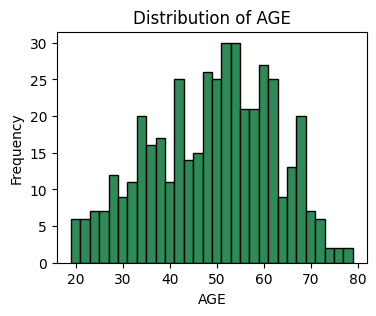

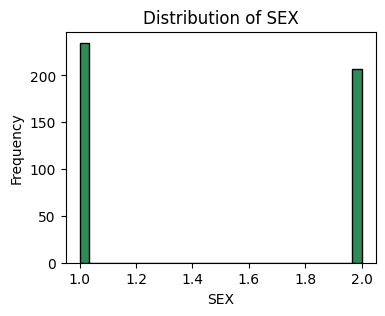

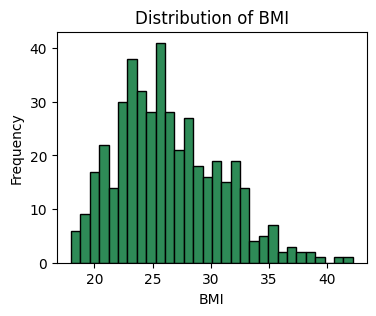

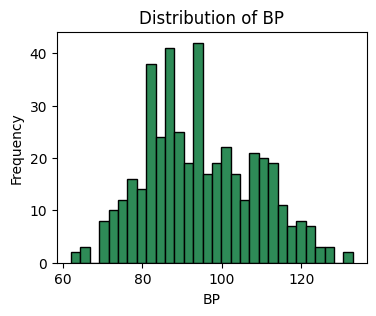

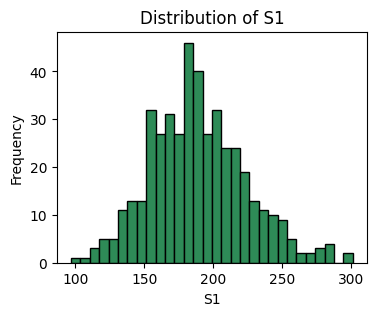

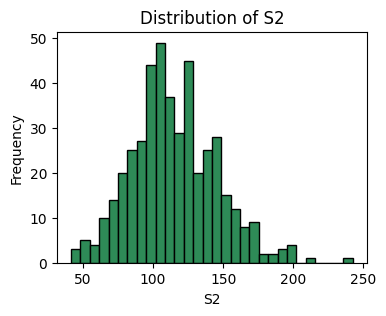

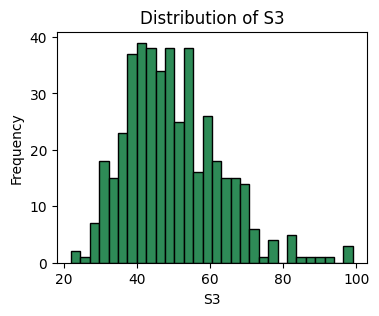

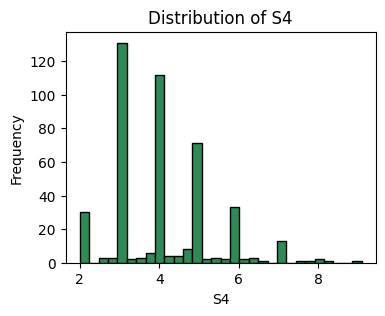

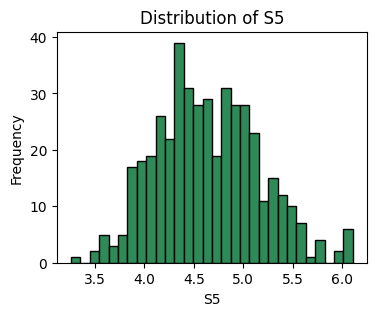

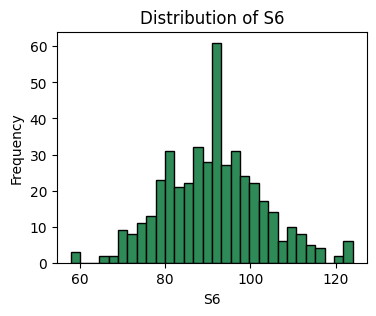

In [7]:
hist_colour = "seagreen"
fig_size = (4, 3) 

for col in df.drop('PROGRESSION', axis=1).columns:
    plt.figure(figsize=fig_size)
    df[col].hist(bins=30, color=hist_colour, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(None)
    plt.show()


The data mostly follows a bell curve and there may be some outliers, but they will not be removed unless necessary as this was not required in the task instructions.

3. Differentiate between independent and dependent variables, and assign them to X and Y

Disease progression is the dependent variable (y) and the independent variables (X) are those that we measure the dependent variable against to see how much they are associated. These are:

* Age       
* Sex         
* BMI         
* BP                                   
* Total serum cholesterol (s1)                              
* Low-density lipoproteins (s2) 
* High-density lipoproteins (s3)                    
* Total cholesterol (s4)     
* Log of serum triglycerides level (s5)   
* Blood glucose level (s6)

In [8]:
X = df.drop('PROGRESSION', axis=1)  # Features - all columns except PROGRESSION
y = df['PROGRESSION']  # Target - only PROGRESSION

print("Features (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())

Features (X):
   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80

Target (y):
0    151
1     75
2    141
3    206
4    135
Name: PROGRESSION, dtype: int64


4. Generate training and test sets comprising 80% and 20% of the data respectively

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

5. Investigate the necessity for scaling or normalisation of the data. Employ MinMaxScaler and StandardScaler if necessary. Fit these scalers on the training set and apply the fitted scalers to transform both the training and test sets accordingly.

The dataset contains data with widely varying scales and units of measurement from age in years to kg/m² for BMI and mmol/L for blood sugar. Thus scaling the data seems necessary. The distribution mostly follows a bell curve, as shown in the historgrams above, making scaling appropriate. All but the dependent variable values are scaled between -1 and 1. StandardScaler is applied below.  

In [10]:
scaler_std = StandardScaler()
X_std = scaler_std.fit_transform(df.drop('PROGRESSION', axis=1))

# Fit StandardScaler on training data only
scaler_std.fit(X_train)

# Transform both training and test sets 
X_train_scaled = scaler_std.transform(X_train)
X_test_scaled = scaler_std.transform(X_test)

6. Generate a multiple linear regression model using the training set. Use all of the independent variables.

In [11]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


7. Print out the intercept and coefficients of the trained model.

In [12]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 153.7365439093484
Coefficients: [  1.75375799 -11.51180908  25.60712144  16.82887167 -44.44885564
  24.64095356   7.67697768  13.1387839   35.16119521   2.35136365]


8. Generate predictions for the test set.

In [13]:
y_predict = model.predict(X_test_scaled)

9. Compute R squared for your model on the test set. You can use r2_score from sklearn.metrics to obtain this score.

Both the Mean Squared Error (MSE) and R-squared (R²) values are calculated for the first model. MSE measures the average squared difference between the actual and predicted values. An MSE of 2900.19 means that, on average, the squared difference between the predicted and actual progression values is about 2 900 units squared.
Lower values are preferable and so this very high value is concerning and means the model is performing poorly. 

R² measures the proportion of variance in the dependent variable (disease progression) explained by this model. An R² of 0.45 means the model explains 45% of the variance. A figure closer to 1 (100%) is preferable. The model captures some of the relationship between the features and progression, but more than half of the variance is unexplained, suggesting there are problems with the model and other factors or non-linear relationships not being included.

More work will need to be done to prepare the data and/or another approach will be needed to improve the model.

In [14]:
mse = mean_squared_error(y_test, y_predict)
print(f"Mean Squared Error: {mse:.2f}")

r2 = r2_score(y_test, y_predict)
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 2900.19
R-squared: 0.45


**References**

HyperionDev. (2025). Supervised Learning – Linear Regression. Course materials. Private repository, GitHub.

HyperionDev. (2025). Machine Learning. Course materials. Private repository, GitHub.